# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

Ground state energy:  -0.46046587969259045
1st excited state energy:  0.09742471331819892
2nd excited state energy:  1.9717331343930118


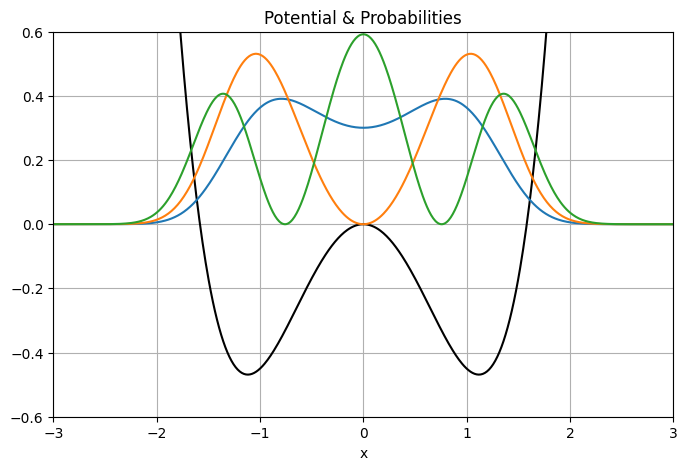

In [2]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

### Andamento Energia

Energia finale: -0.4439 +/- 0.0017


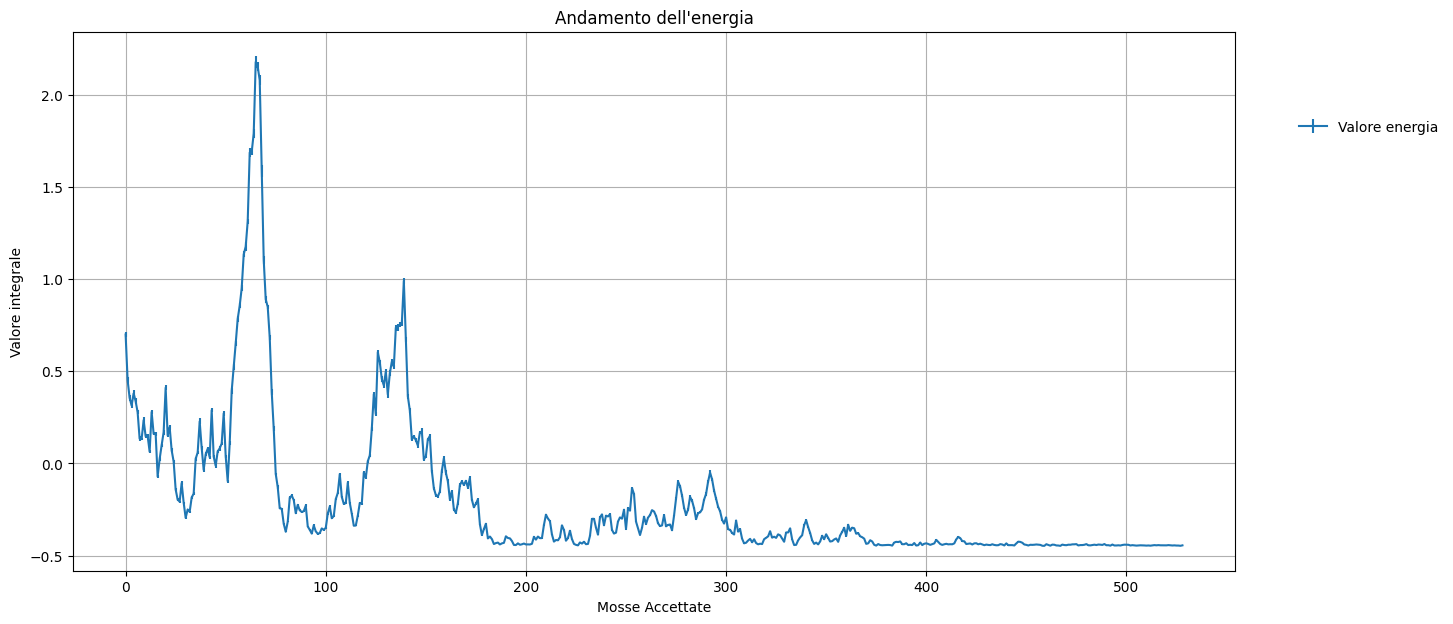

In [3]:
energia = np.loadtxt("Dati/SimAnnealing.dat", unpack = True)

fig, ax = plt.subplots(1, 1, figsize = (15, 7))

ax.errorbar(np.array([i for i in range(0, 529)]), energia[0, :], yerr = energia[1, :], label = 'Valore energia')
plt.legend(loc=(1.05, 0.8), frameon=False)

ax.set_xlabel("Mosse Accettate")
ax.set_ylabel("Valore integrale")
ax.set_title("Andamento dell'energia")

print("Energia finale: " + str(round(energia[0, 528], 4)) + " +/- " + str(round(energia[1, 528], 4)))

plt.grid(True)
plt.show()

### Cambio parametri

Mu finale: 0.8063
Sigma finale: 0.5976


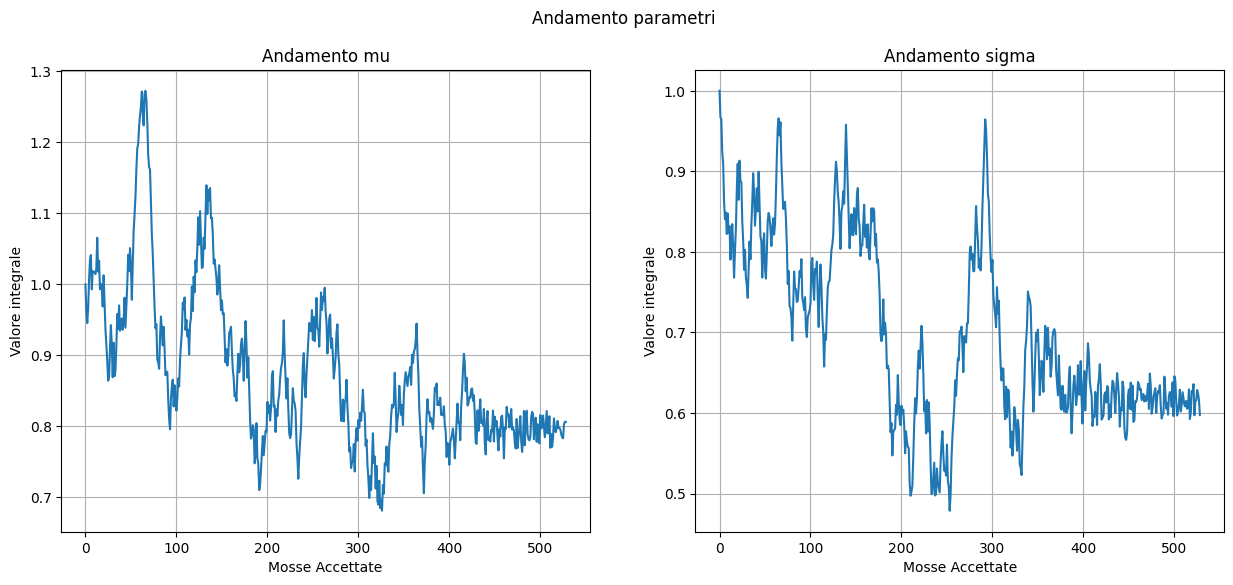

In [4]:
para = np.loadtxt("Dati/Parametri.dat", unpack = True)

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
titoli = np.array(['Andamento mu', 'Andamento sigma'])

for j in range(0, 2):
    ax[j].plot(np.array([i for i in range(0, 529)]), para[j, :])
    ax[j].set_xlabel("Mosse Accettate")
    ax[j].set_ylabel("Valore integrale")
    ax[j].set_title(titoli[j])  
    ax[j].grid(True)  

fig.suptitle("Andamento parametri")

print("Mu finale: " + str(round(para[0, 528], 4)))
print("Sigma finale: " + str(round(para[1, 528], 4)))


plt.show()

### Traiettoria nello spazio dei parametri

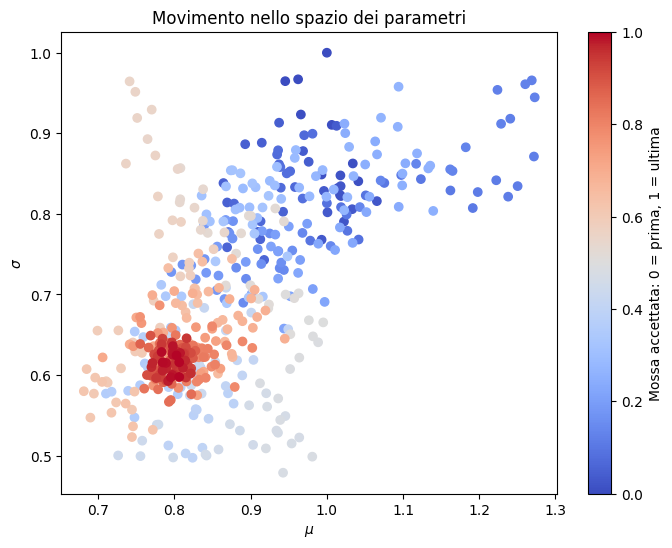

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

x = para[0, :]
y = para[1, :]

colors = np.linspace(0, 1, len(x))
sc = plt.scatter(x, y, c=colors, cmap='coolwarm')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title("Movimento nello spazio dei parametri")

cbar = plt.colorbar(sc)
cbar.set_label('Mossa accettata: 0 = prima, 1 = ultima')

plt.show()


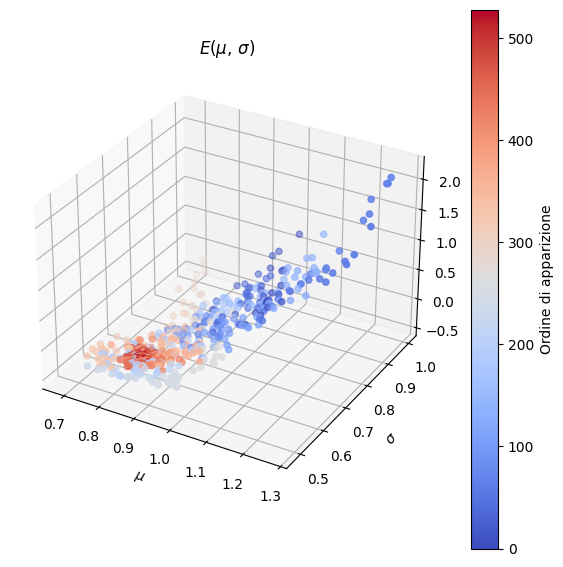

In [6]:
z = energia[0, :]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Creazione di una sequenza di colori in base all'ordine di apparizione dei punti
colors = np.arange(len(z))

scatter = ax.scatter(x, y, z, c=colors, cmap='coolwarm')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_title(r'$E\left(\mu,\,\sigma\right)$')

# Creazione di un oggetto mappable per la barra dei colori
sm = ScalarMappable(cmap='coolwarm')
sm.set_array(colors)

# Aggiunta di una barra dei colori all'oggetto Axes ax
plt.colorbar(sm, ax=ax, label='Ordine di apparizione')

plt.show()

### $E\left(\mu,\,\sigma\right)$

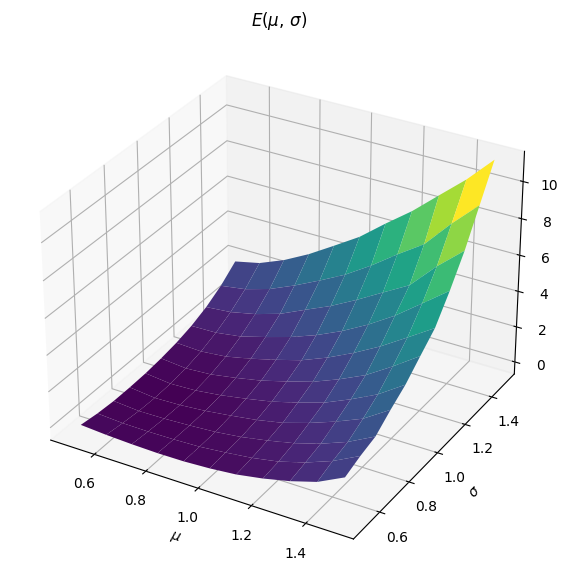

In [7]:
# Crea una griglia di valori x e y
x = np.linspace(0.5, 1.5, 11)
y = np.linspace(0.5, 1.5, 11)
x, y = np.meshgrid(x, y)

# Calcola i valori di z (funzione x^2 + y^2)
z = np.loadtxt("Dati/Grafico.dat")

# Crea la figura e l'asse 3D
fig = plt.figure( figsize = (7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_title(r'$E\left(\mu,\,\sigma\right)$')

plt.show()

### Errore sui parametri $\sigma$, $\mu$

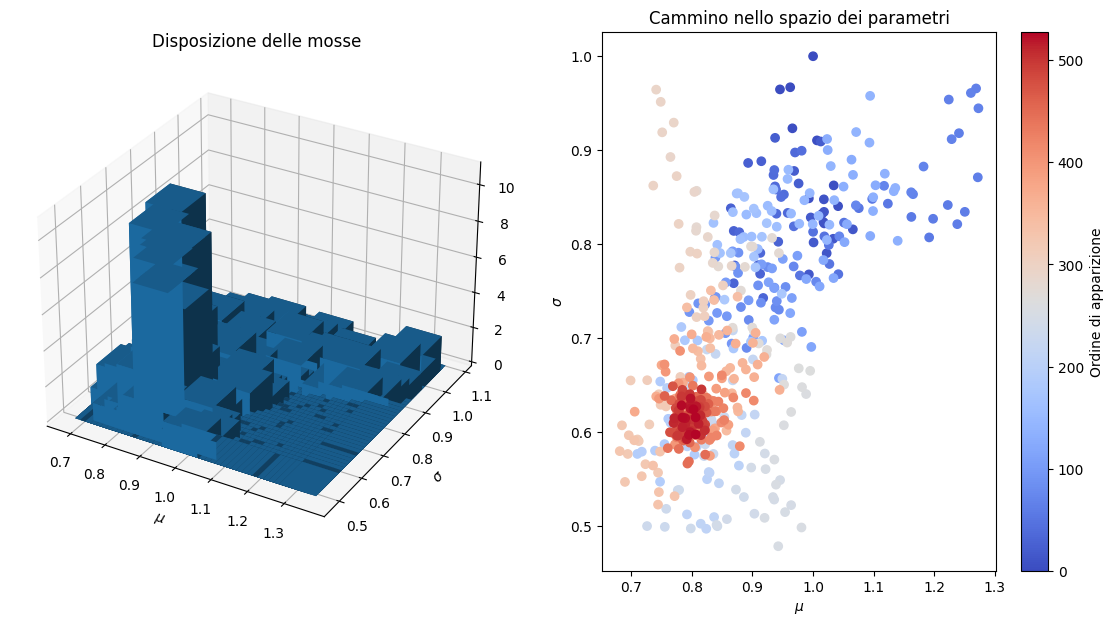

In [8]:
x = para[0, :]
y = para[1, :]

fig = plt.figure(figsize = (14, 7))

#Istogramma
ax1 = fig.add_subplot(121, projection='3d')  # Sottografo 1

# Calcola l'istogramma 2D
hist, xedges, yedges = np.histogram2d(x, y, bins=40)
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dx = dy = 0.1
dz = hist.ravel()

# Disegna l'istogramma 3D
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma$')
ax1.set_title(r'Disposizione delle mosse')

#Cammino in spazio delle fasi
ax2 = fig.add_subplot(122)  # Sottografo 2
colors = np.arange(len(x))
scatter = ax2.scatter(x, y, c=colors, cmap='coolwarm')

# Creazione di un oggetto mappable per la barra dei colori
sm = ScalarMappable(cmap='coolwarm')
sm.set_array(colors)

# Aggiunta di una barra dei colori all'oggetto Axes ax
plt.colorbar(sm, ax=ax2, label='Ordine di apparizione')

ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$\sigma$')
ax2.set_title(r'Cammino nello spazio dei parametri')

# Mostra il grafico
plt.show()

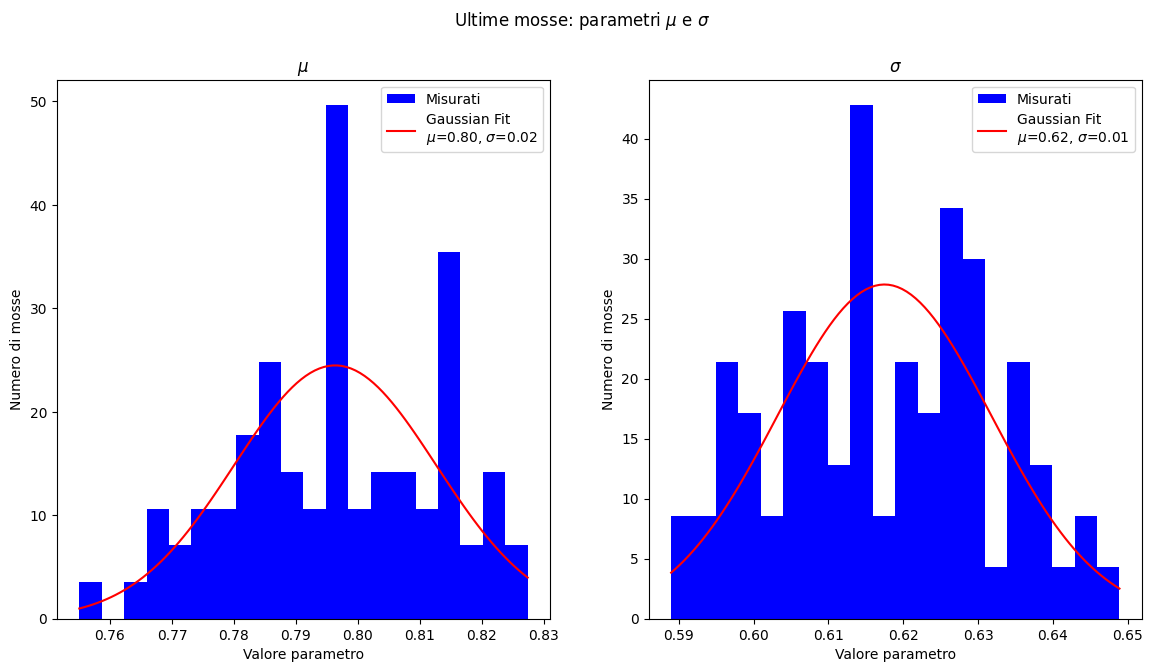

In [9]:
x = para[0, 450:528]
y = para[1, 450:528]

fig, ax = plt.subplots(1, 2, figsize = (14, 7))

for i in range(0, 2):
    if i==0:
        ax[i].hist(x, bins=20, facecolor='blue', density = True, label = 'Misurati')
        ax[i].set_title(r'$\mu$')

        mu1, std1 = norm.fit(x) 
        x1 = np.linspace(x.min(), x.max(), 100)
        y1 = norm.pdf(x1, mu1, std1)
        ax[i].plot(x1, y1, 'r-', label='Gaussian Fit\n$\mu$={:.2f}, $\sigma$={:.2f}'.format(mu1, std1))

        

    else:
        ax[i].hist(y, bins=20, facecolor='blue', density = True, label = 'Misurati')
        ax[i].set_title(r'$\sigma$')

        mu1, std1 = norm.fit(y) 
        x1 = np.linspace(y.min(), y.max(), 100)
        y1 = norm.pdf(x1, mu1, std1)
        ax[i].plot(x1, y1, 'r-', label='Gaussian Fit\n$\mu$={:.2f}, $\sigma$={:.2f}'.format(mu1, std1))
    
    ax[i].set_ylabel('Numero di mosse')
    ax[i].set_xlabel('Valore parametro')
    ax[i].legend()

fig.suptitle(r'Ultime mosse: parametri $\mu$ e $\sigma$')
plt.show()

### Integrale ottimizzato

Energia finale: -0.4441 +/- 0.0019


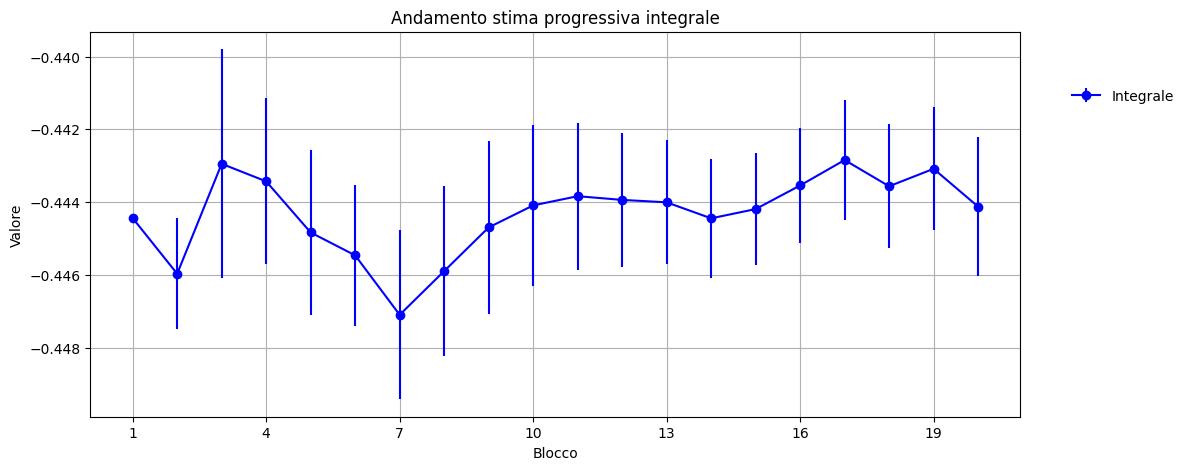

In [10]:
# Importo i valori generati con codice in C++
int_ott = np.loadtxt("Dati/Integrale.dat", unpack=True)
figura, plot = plt.subplots(1, 1, figsize=(12, 5))

x = np.arange(1, 21, 1)
plt.errorbar(x, int_ott[0, : ], yerr=int_ott[1, :], label = "Integrale", color = 'blue', fmt = 'o-')
plt.xlabel('Blocco')
plt.ylabel('Valore')

plt.legend(loc=(1.05, 0.8), frameon=False)
plt.title(f"Andamento stima progressiva integrale")

print("Energia finale: " + str(round(int_ott[0, 19], 4)) + " +/- " + str(round(int_ott[1, 19], 4)))

plt.xticks(np.arange(min(x), max(x) + 1, 3))
plt.grid(True)
plt.show()

### Confronti funzioni d'onda

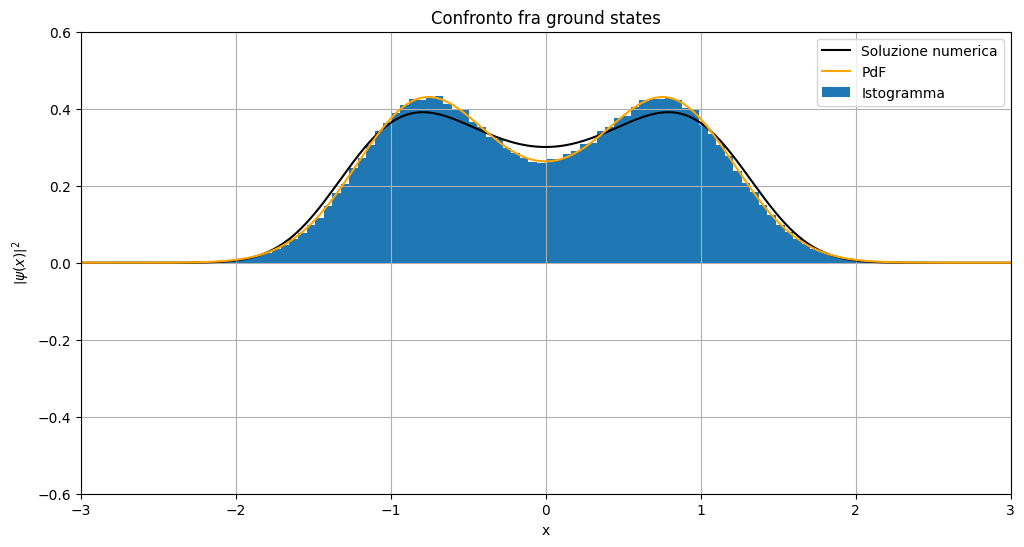

In [11]:
plt.figure(figsize=(12,6))

def PdF(x,sigma,mu):
    N = np.sqrt(2*sigma*np.sqrt(math.pi)*(1+np.exp(-(mu/sigma)**2)))
    return (np.exp(-(((x-mu)/sigma)**2)/2) + np.exp(-(((x+mu)/sigma)**2)/2))/N

mu = para[0, 528]
sigma = para[1, 528]
x = np.linspace(-a/2, a/2, N)
appo = np.loadtxt('Dati/Campionamento.dat')

plt.plot(x,(psi[0])**2, color = 'black', label = 'Soluzione numerica')
plt.plot(x, PdF(x, sigma, mu)**2, color = 'orange', label = 'PdF')
plt.hist(appo, density=True, bins=100, label='Istogramma')

plt.xlabel("x")
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.ylabel(r"$\left|\psi\left(x\right)\right|^2$")
plt.title("Confronto fra ground states")

plt.grid(True)
plt.legend()
plt.show()